In [1]:
import pandas as pd
import numpy as np
from scipy.stats import boxcox, skew, kurtosis, pearsonr
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load dataset
df = pd.read_csv(r'C:\Users\vicky\Downloads\CAR DETAILS FROM CAR DEKHO.csv')

# Select numeric columns
numeric_cols = ["year", "selling_price", "km_driven"]

In [3]:
# Apply Box-Cox Transformation (only for positive values)
boxcox_results = {}
transformed_data = {}

for col in numeric_cols:
    data = df[col]
    data = data[data > 0]  # Box-Cox requires >0
    
    # Box-Cox transformation
    transformed, lmbda = boxcox(data)
    boxcox_results[col] = {"lambda": lmbda, "transformed_sample": transformed[:5]}
    transformed_data[col] = (data, transformed, lmbda)

C:\Users\vicky\AppData\Local\Programs\Python\Python313\Lib\site-packages\scipy\stats\_morestats.py:1186: UserWarning: The optimal lambda is 154.88080556391728, but the returned lambda is the constrained optimum to ensure that the maximum or the minimum of the transformed data does not overflow in <class 'numpy.float64'>.
  lmax = boxcox_normmax(x, method='mle', optimizer=optimizer)


In [4]:
# Compute skewness and kurtosis
skewness_results = {col: skew(df[col]) for col in numeric_cols}
kurtosis_results = {col: kurtosis(df[col]) for col in numeric_cols}

In [5]:
# Compute Pearson correlation between pairs of numeric features
pearson_results = {}
for i in range(len(numeric_cols)):
    for j in range(i+1, len(numeric_cols)):
        col1, col2 = numeric_cols[i], numeric_cols[j]
        corr, p_value = pearsonr(df[col1], df[col2])
        pearson_results[f"{col1} vs {col2}"] = corr


In [6]:
# ================== PRINT RESULTS ==================
print("=== Box-Cox Transformation ===")
for col, res in boxcox_results.items():
    print(f"{col}: lambda={res['lambda']:.4f}, sample={res['transformed_sample']}")

print("\n=== Skewness ===")
print(skewness_results)

print("\n=== Kurtosis ===")
print(kurtosis_results)

print("\n=== Pearson Correlation ===")
print(pearson_results)


=== Box-Cox Transformation ===
year: lambda=92.6442, sample=[9.88420148e+303 9.88420148e+303 1.24466719e+304 1.56644955e+304
 1.36467193e+304]
selling_price: lambda=-0.0218, sample=[ 9.78330167 10.41585526 11.55062256 10.8890878  11.33462973]
km_driven: lambda=0.4217, sample=[259.46481049 224.83104332 301.95949617 216.98165234 349.40454187]

=== Skewness ===
{'year': np.float64(-0.83295192910917), 'selling_price': np.float64(4.89033051912242), 'km_driven': np.float64(2.6681344132720346)}

=== Kurtosis ===
{'year': np.float64(0.666111471722795), 'selling_price': np.float64(37.043446659266586), 'km_driven': np.float64(23.288573012407326)}

=== Pearson Correlation ===
{'year vs selling_price': np.float64(0.4139216798108548), 'year vs km_driven': np.float64(-0.4196881460829113), 'selling_price vs km_driven': np.float64(-0.1922886305451144)}


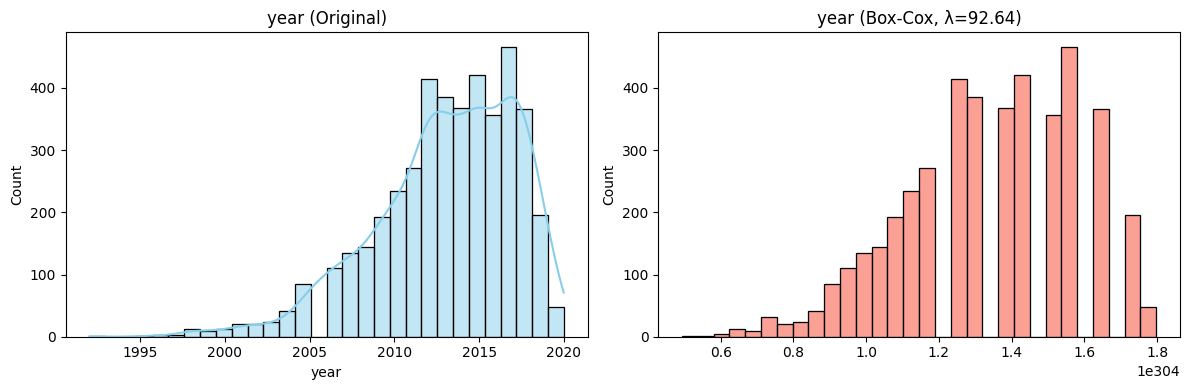

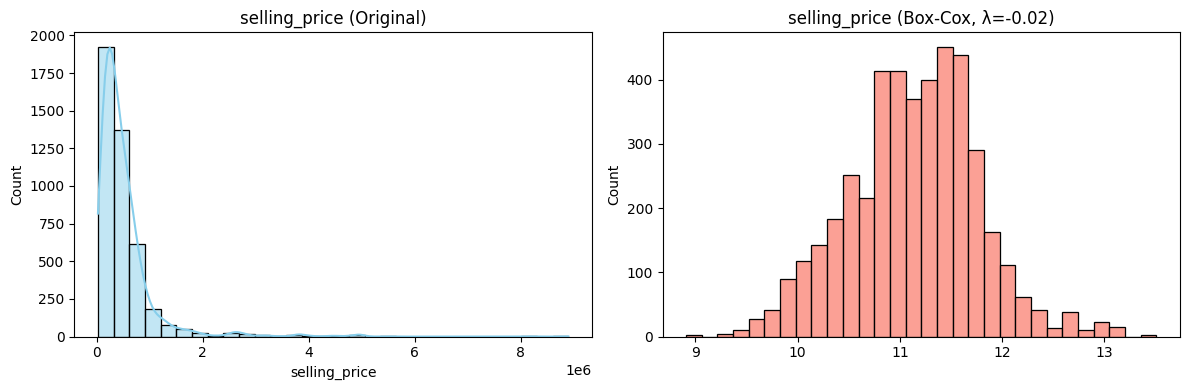

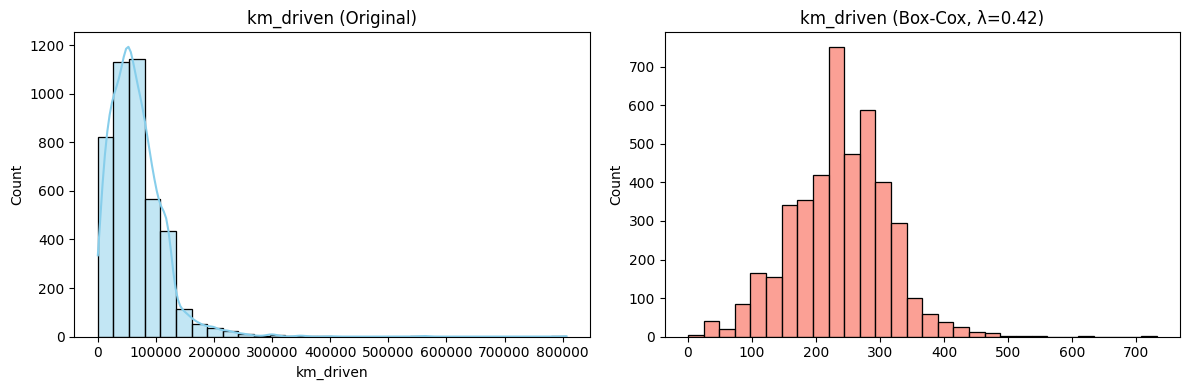

In [7]:
# ================== PLOTS ==================
# 1. Box-Cox Before vs After
for col, (orig, trans, lmbda) in transformed_data.items():
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    
    sns.histplot(orig, bins=30, kde=True, ax=axes[0], color="skyblue")
    axes[0].set_title(f"{col} (Original)")
    
    sns.histplot(trans, bins=30, kde=False, ax=axes[1], color="salmon")
    axes[1].set_title(f"{col} (Box-Cox, λ={lmbda:.2f})")
    
    plt.tight_layout()
    plt.show()


C:\Users\vicky\AppData\Local\Temp\ipykernel_2920\556935765.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(skewness_results.keys()), y=list(skewness_results.values()), palette="Blues_d")


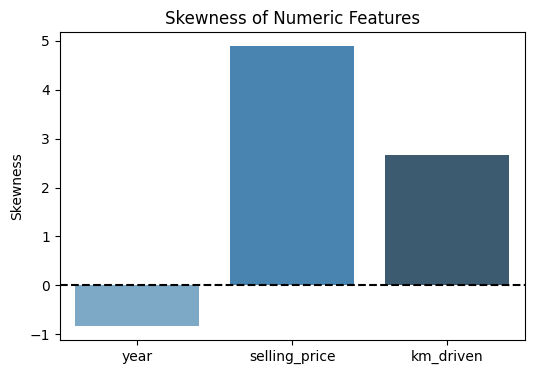

In [8]:
# 2. Skewness bar graph
plt.figure(figsize=(6,4))
sns.barplot(x=list(skewness_results.keys()), y=list(skewness_results.values()), palette="Blues_d")
plt.axhline(0, color="black", linestyle="--")
plt.title("Skewness of Numeric Features")
plt.ylabel("Skewness")
plt.show()

C:\Users\vicky\AppData\Local\Temp\ipykernel_2920\1156358294.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(kurtosis_results.keys()), y=list(kurtosis_results.values()), palette="Greens_d")


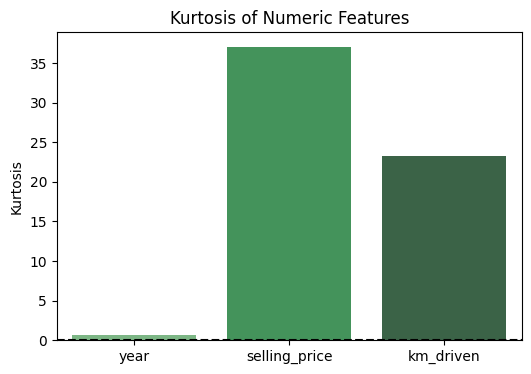

In [9]:
# 3. Kurtosis bar graph
plt.figure(figsize=(6,4))
sns.barplot(x=list(kurtosis_results.keys()), y=list(kurtosis_results.values()), palette="Greens_d")
plt.axhline(0, color="black", linestyle="--")
plt.title("Kurtosis of Numeric Features")
plt.ylabel("Kurtosis")
plt.show()

C:\Users\vicky\AppData\Local\Temp\ipykernel_2920\1031276795.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(pearson_results.keys()), y=list(pearson_results.values()), palette="Oranges_d")


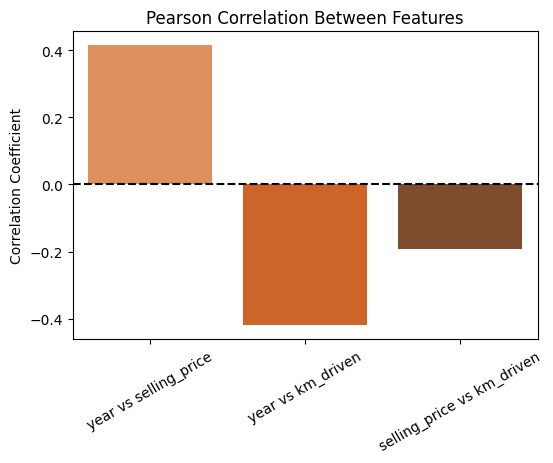

In [10]:
# 4. Pearson correlation bar graph
plt.figure(figsize=(6,4))
sns.barplot(x=list(pearson_results.keys()), y=list(pearson_results.values()), palette="Oranges_d")
plt.axhline(0, color="black", linestyle="--")
plt.title("Pearson Correlation Between Features")
plt.ylabel("Correlation Coefficient")
plt.xticks(rotation=30)
plt.show()